# Field tracing method

In [2]:
import numpy as np

def FT(x):
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(x)))
def IFT(x):
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(x)))

We consider the following Maxwell's equatiions:

$$
\vec{\nabla} \times \vec{E}(\vec{r}, \omega) = i \omega \mu_0 \vec{H}(\vec{r}, \omega)  \hspace{1cm} \vec{\nabla} \times \vec{H}(\vec{r}\omega) = -i\omega \varepsilon_0 \hat{\varepsilon}_r (\vec{r}, \omega) \vec{E}(\vec{r}, \omega)
$$

$$
\vec{\nabla} \cdot \left[ \hat{\varepsilon}_r (\vec{r}, \omega) \vec{E}(\vec{r}, \omega) \right] = 0 \hspace{1cm} \vec{\nabla} \cdot \vec{H}(\vec{r}, \omega) = 0
$$

We define Hx and Hy as the Hermite–Gaussian modes:

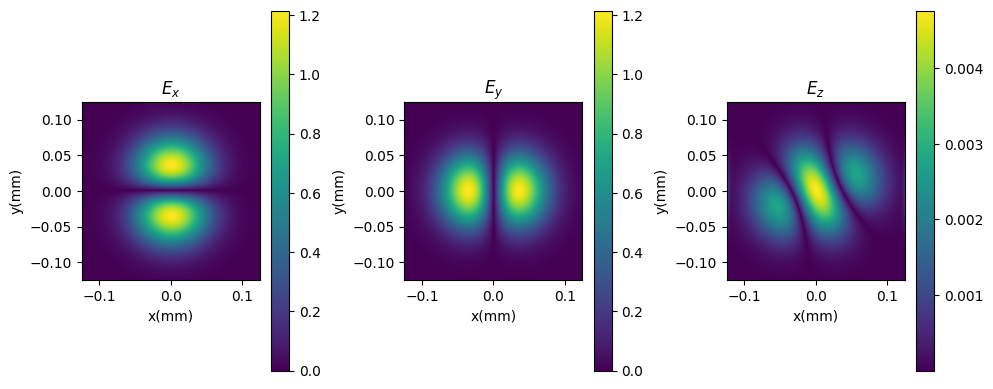

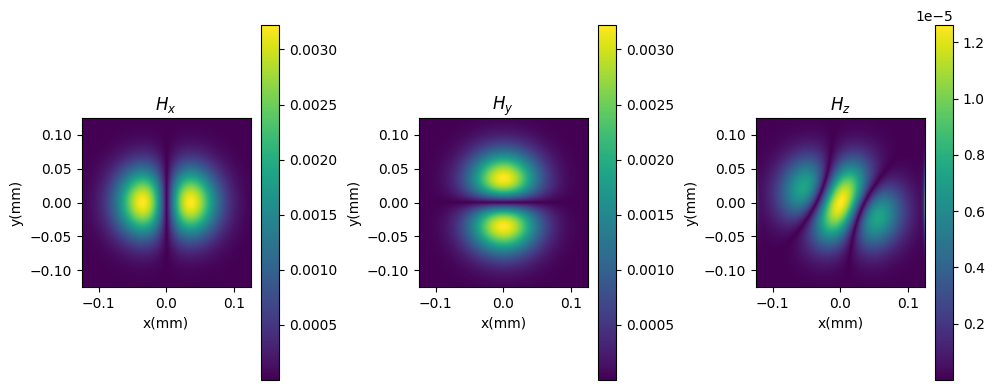

In [6]:
import matplotlib.pyplot as plt
from scipy.special import hermite

l = 532.0e-9
N = 500
dx = 0.5e-6
z_r = 15e-3
n_0 = 1.0
w0 = np.sqrt(l * z_r / (np.pi * n_0))

x = (np.arange(N) - N/2) * dx
y = (np.arange(N) - N/2) * dx
X, Y = np.meshgrid(x, y)
xy_extent = [-N/2*dx*1e3, N/2*dx*1e3, -N/2*dx*1e3, N/2*dx*1e3]

H0 = hermite(0)
H1 = hermite(1)

G = np.exp(-(X**2 + Y**2) / w0**2)

Ey = H1(np.sqrt(2)*X/w0) * H0(np.sqrt(2)*Y/w0) * G
Ex = H0(np.sqrt(2)*X/w0) * H1(np.sqrt(2)*Y/w0) * G

kx = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
ky = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))
KX, KY = np.meshgrid(kx, ky)
k0 = 2 * np.pi / l
kz = np.sqrt(np.maximum(0, k0**2 - KX**2 - KY**2))

Ez = -FT((kx * IFT(Ex) + ky * IFT(Ey)) / kz)

E_vec = np.array([Ex, Ey, Ez])
epsilon_0 = 8.854187817e-12
mu_0 = 4e-7 * np.pi

H_vec = np.array([
    -(np.sqrt(epsilon_0 / mu_0)) * (1 / k0) * FT((1 / kz) * (kx * ky * IFT(Ex) + (ky**2 + kz**2) * IFT(Ey))),
    -(np.sqrt(epsilon_0 / mu_0)) * (1 / k0) * FT((1 / kz) * (kx * ky * IFT(Ey) + (kx**2 + kz**2) * IFT(Ex))),
    (np.sqrt(epsilon_0 / mu_0)) * (1 / k0) * FT((kx * IFT(Ey) - ky * IFT(Ex)))
])

fig, sub = plt.subplots(1, 3, figsize=(10, 4))

im1 = sub[0].imshow(np.abs(Ex), extent=xy_extent, origin='lower')
plt.colorbar(im1, ax=sub[0])
sub[0].set_title("$E_x$")
sub[0].set_xlabel("x(mm)")
sub[0].set_ylabel("y(mm)")

im2 = sub[1].imshow(np.abs(Ey), extent=xy_extent, origin='lower')
plt.colorbar(im2, ax=sub[1])
sub[1].set_title("$E_y$")
sub[1].set_xlabel("x(mm)")
sub[1].set_ylabel("y(mm)")

im3 = sub[2].imshow(np.abs(Ez), extent=xy_extent, origin='lower')
plt.colorbar(im3, ax=sub[2])
sub[2].set_title("$E_z$")
sub[2].set_xlabel("x(mm)")
sub[2].set_ylabel("y(mm)")

    
plt.tight_layout()

fig, sub = plt.subplots(1, 3, figsize=(10, 4))

im1 = sub[0].imshow(np.abs(H_vec[0]), extent=xy_extent, origin='lower')
plt.colorbar(im1, ax=sub[0])
sub[0].set_title("$H_x$")
sub[0].set_xlabel("x(mm)")
sub[0].set_ylabel("y(mm)")

im2 = sub[1].imshow(np.abs(H_vec[1]), extent=xy_extent, origin='lower')
plt.colorbar(im2, ax=sub[1])
sub[1].set_title("$H_y$")
sub[1].set_xlabel("x(mm)")
sub[1].set_ylabel("y(mm)")

im3 = sub[2].imshow(np.abs(H_vec[2]), extent=xy_extent, origin='lower')
plt.colorbar(im3, ax=sub[2])
sub[2].set_title("$H_z$")
sub[2].set_xlabel("x(mm)")
sub[2].set_ylabel("y(mm)")

    
plt.tight_layout()
plt.show()